In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>First look at the data 

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.shape

(11162, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


----

As you can see from our data, the balance has a large standard error, and since I chose it as the target value for my regression models, I will do the following methods.

To begin with, I want to divide my data in terms of balance, the division will be the following type, values ​​that are less than zero, values ​​that are greater than 9366.

I will calculate and separate using the <code>np.percestile(value)</code> method

The meaning of this solution is for my machine learning model, since using the train_test_split method we split our data randomly, which is already bad when we have a big error among our data. 

In [7]:
df_less_zero = df[df.balance <= np.percentile(df.balance, 6.1)]
df_less_zero.count()

age          688
job          688
marital      688
education    688
default      688
balance      688
housing      688
loan         688
contact      688
day          688
month        688
duration     688
campaign     688
pdays        688
previous     688
poutcome     688
deposit      688
dtype: int64

In [8]:
df_more = df[df.balance >= np.percentile(df.balance, 98)]
df_more.count()

age          225
job          225
marital      225
education    225
default      225
balance      225
housing      225
loan         225
contact      225
day          225
month        225
duration     225
campaign     225
pdays        225
previous     225
poutcome     225
deposit      225
dtype: int64

In [9]:
df_middle = df[(df.balance < np.percentile(df.balance, 98)) & (df.balance > np.percentile(df.balance, 6.1))]
df_middle.count()

age          10249
job          10249
marital      10249
education    10249
default      10249
balance      10249
housing      10249
loan         10249
contact      10249
day          10249
month        10249
duration     10249
campaign     10249
pdays        10249
previous     10249
poutcome     10249
deposit      10249
dtype: int64

----

In the next cells i want create another .csv file named train and test by dividing in percents

In [16]:
train_df = df_less_zero.sample(frac=0.7, random_state=1)
test_df = df_less_zero.sample(frac=0.3, random_state=1)
train_df_md = df_middle.sample(frac=0.7, random_state=1)
test_df_md = df_middle.sample(frac=0.3, random_state=1)
train_df_mr = df_more.sample(frac=0.7, random_state=1)
test_df_mr = df_more.sample(frac=0.3, random_state=1)

train = [train_df, train_df_md, train_df_mr]
test = [test_df, test_df_md, test_df_mr]

train = pd.concat(train)
test = pd.concat(test)

train.to_csv('train.csv')
test.to_csv('test.csv')

The 'pdays' column behaves quite strangely if we look at it with the help of the <code>DataFrame['column_name'].describe()</code> method which will allow us to better understand the column 

In [7]:
df["pdays"].describe().T

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

Next, let's apply the <code>DataFrame['column_name'].value_counts()</code> method to find out the number of duplicate values

In [8]:
df["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 68        1
 108       1
 228       1
 268       1
 551       1
Name: pdays, Length: 472, dtype: int64

-1 this is missing data, since there is a very large number of them, we cannot consider such an option as deleting 

In [9]:
df["pdays"][df["pdays"] > 0].describe()

count    2838.000000
mean      204.818182
std       122.196901
min         1.000000
25%        98.000000
50%       182.000000
75%       286.000000
max       854.000000
Name: pdays, dtype: float64

But if we look at those data that are not missing and we can notice that the data is normal and the mean value is greater than the median, which indicates that it is distorted to the right with which standardization can help us 

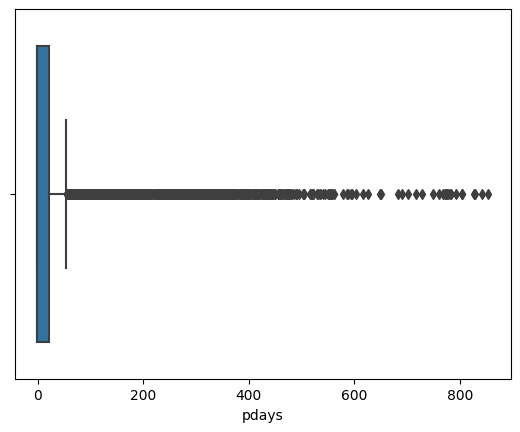

In [10]:
sns.boxplot(x=df["pdays"])
plt.show()

In [9]:
df.drop(df[df["pdays"]>600].index,inplace=True)

In [10]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3800
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         445
previous       32
poutcome        4
deposit         2
dtype: int64

#### After function nunique() we can divide our data to categorical and numeric data

In [11]:
categorical = ['job', 'education','marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'previous', 'pdays']

## Data visualization

In [13]:
df.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112063,-0.000441,-0.000085,-0.005507,0.004973,0.024103
balance,0.112063,1.000000,0.010457,0.022271,-0.014061,0.020117,0.033540
day,-0.000441,0.010457,1.000000,-0.018569,0.137029,-0.079678,-0.058689
duration,-0.000085,0.022271,-0.018569,1.000000,-0.041911,-0.024541,-0.025901
campaign,-0.005507,-0.014061,0.137029,-0.041911,1.000000,-0.101737,-0.050610
pdays,0.004973,0.020117,-0.079678,-0.024541,-0.101737,1.000000,0.518492
previous,0.024103,0.033540,-0.058689,-0.025901,-0.050610,0.518492,1.000000


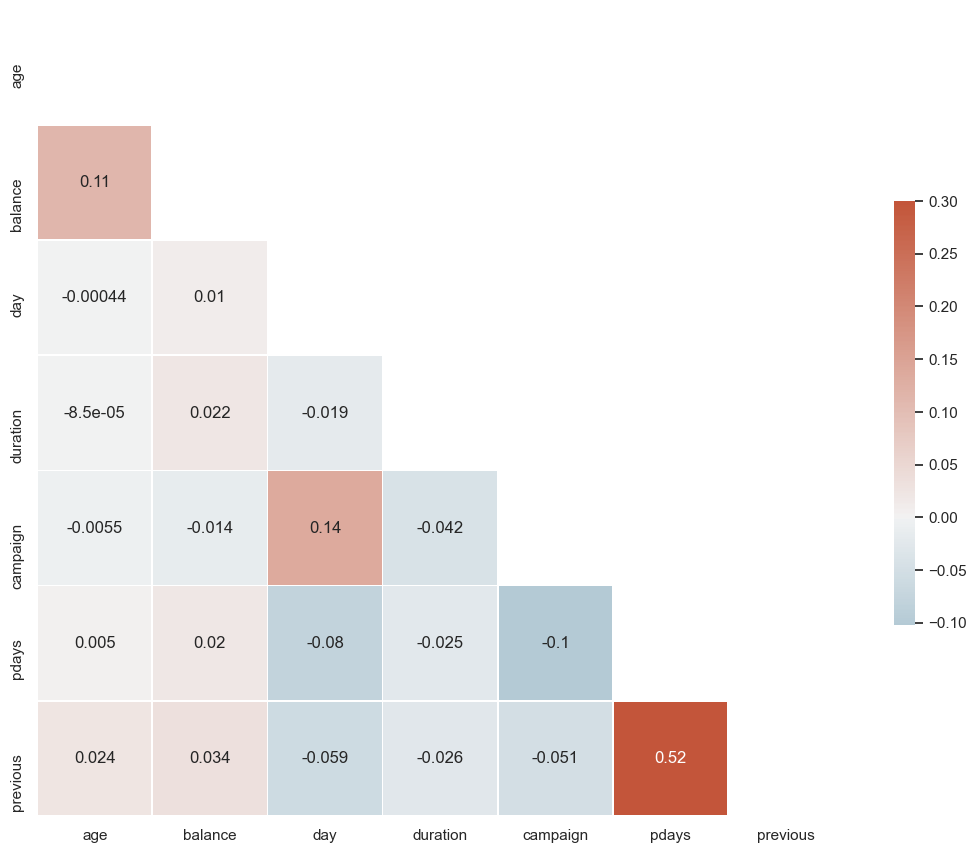

In [14]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=0.3, center=0, fmt=".2g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

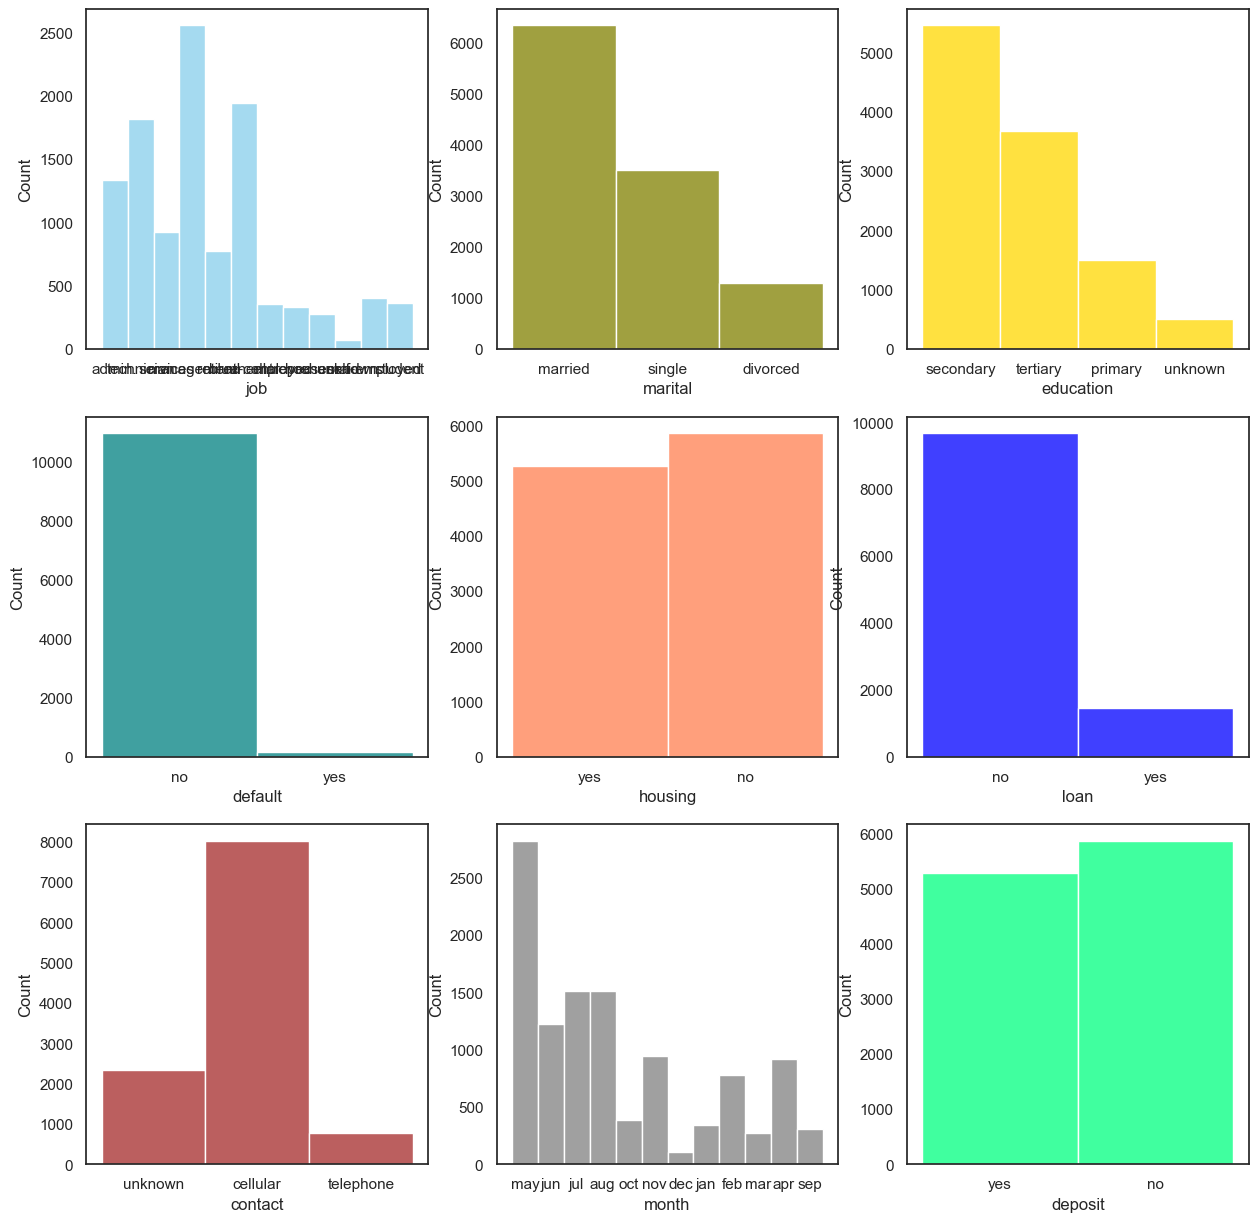

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(data=df, x="job", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="marital", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="education", color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="default", color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="housing", color="coral", ax=axs[1, 1])
sns.histplot(data=df, x="loan", color="blue", ax=axs[1, 2])
sns.histplot(data=df, x="contact", color="brown", ax=axs[2, 0])
sns.histplot(data=df, x="month", color="gray", ax=axs[2, 1])
sns.histplot(data=df, x="deposit", color="springgreen", ax=axs[2, 2])
plt.show()

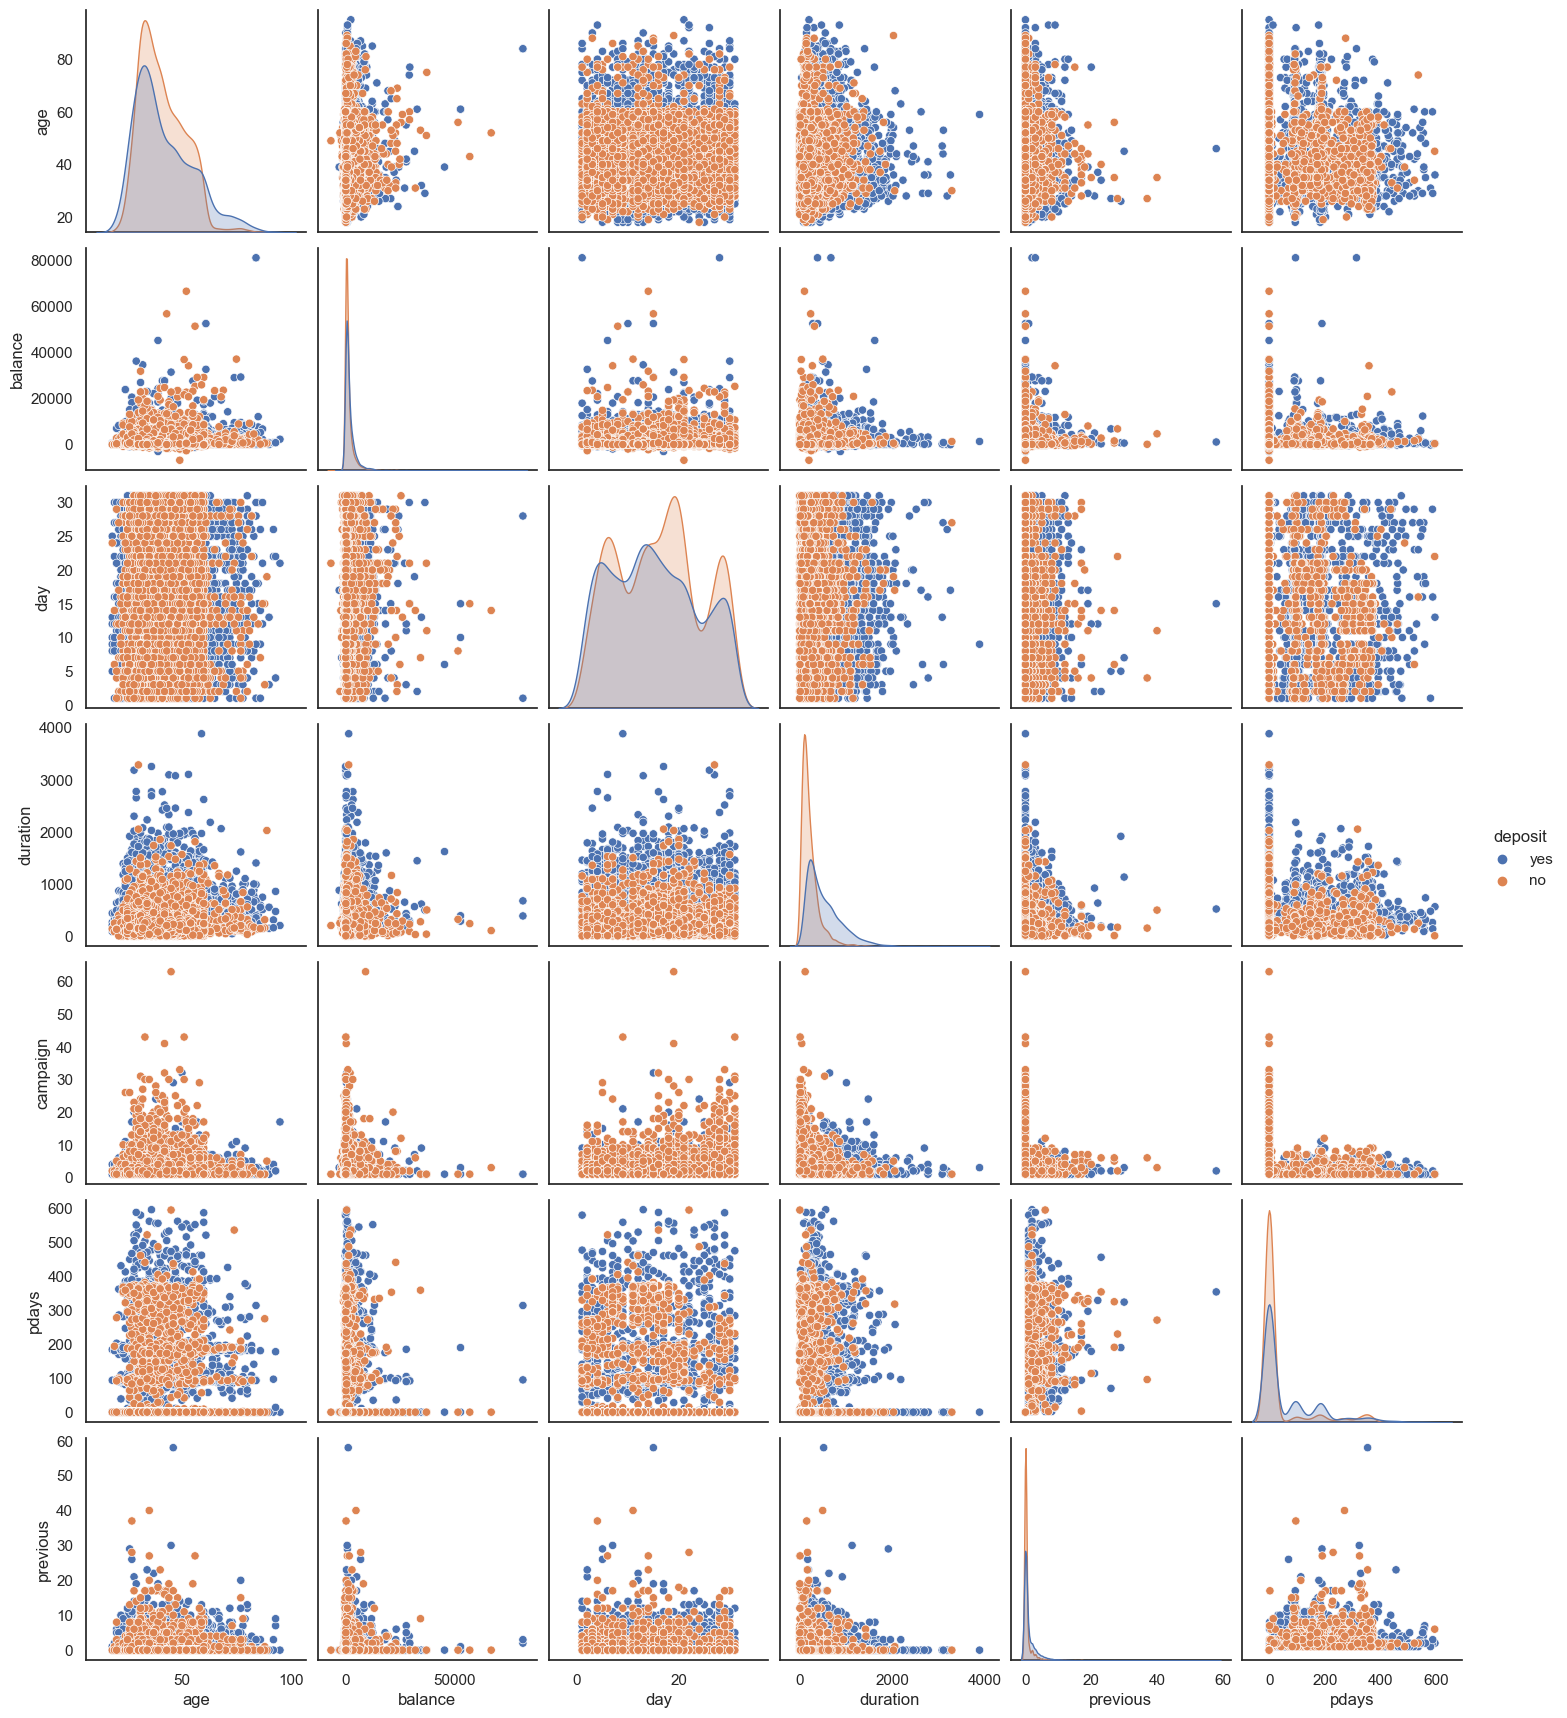

In [16]:
sns.pairplot(data=df, x_vars=numerical, hue='deposit')
plt.show()

## Encoding categorical data

In [12]:
df.replace({'deposit': {"yes": 1,'no':0}},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11135 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11135 non-null  int64 
 1   job        11135 non-null  object
 2   marital    11135 non-null  object
 3   education  11135 non-null  object
 4   default    11135 non-null  object
 5   balance    11135 non-null  int64 
 6   housing    11135 non-null  object
 7   loan       11135 non-null  object
 8   contact    11135 non-null  object
 9   day        11135 non-null  int64 
 10  month      11135 non-null  object
 11  duration   11135 non-null  int64 
 12  campaign   11135 non-null  int64 
 13  pdays      11135 non-null  int64 
 14  previous   11135 non-null  int64 
 15  poutcome   11135 non-null  object
 16  deposit    11135 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.1+ MB


In [13]:
df = pd.get_dummies(df, columns=categorical)
df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

## Machine Learning for Classification

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X=df.drop('deposit',axis=1)
y=df['deposit']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### Scaling data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scl=StandardScaler()

In [21]:
scaler_train=scl.fit(X_train)
scaler_test=scl.fit(X_test)

In [22]:
X_train=scaler_train.transform(X_train)
X_test=scaler_test.transform(X_test)

In [23]:
X_train

array([[-1.03382579, -0.38160237,  0.01736746, ..., -0.21681146,
        -0.32150981,  0.57354846],
       [-0.6120081 , -0.4602142 , -0.33934158, ..., -0.21681146,
        -0.32150981,  0.57354846],
       [-0.52764456,  0.6649956 ,  1.6820096 , ..., -0.21681146,
        -0.32150981,  0.57354846],
       ...,
       [ 0.40035435,  0.59231085,  0.4929795 , ..., -0.21681146,
        -0.32150981,  0.57354846],
       [ 1.58144389, -0.43213854,  0.61188251, ..., -0.21681146,
         3.11032497, -1.74353184],
       [-0.19019041, -0.34104865, -0.45824459, ..., -0.21681146,
        -0.32150981,  0.57354846]])

## Machine Learning for Regression

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
X=df.drop('balance',axis=1)
y=df['balance']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Scaling data

In [186]:
scl=StandardScaler()

In [187]:
scaler_train=scl.fit(X_train)
scaler_test=scl.fit(X_test)

In [188]:
X_train=scaler_train.transform(X_train)
X_test=scaler_test.transform(X_test)

In [189]:
X_train

array([[-3.62235274e-01,  5.20756507e-01, -9.29502323e-01, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01],
       [-8.65356529e-01,  1.34848446e+00, -2.33523187e-01, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01],
       [-8.65356529e-01, -1.13469940e+00, -1.59796583e-01, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01],
       ...,
       [-7.81502987e-01,  5.20756507e-01,  3.34369161e+00, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01],
       [ 8.95567864e-01,  7.57250208e-01,  1.94583521e+00, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01],
       [-1.11691716e+00, -1.13469940e+00, -5.47120148e-04, ...,
        -2.36148091e-01, -3.28054995e-01,  6.17178662e-01]])

<h2>GridSearch Importing

In [24]:
from sklearn.model_selection import GridSearchCV

### KNeighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
parameters={
"n_neighbors":[3, 5, 7, 11, 13],
"weights" : ['uniform', 'distance'],
"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [30]:
tuning_model=GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

In [31]:
tuning_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [32]:
tuning_model.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}

In [33]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='auto', weights='distance')

In [34]:
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.74      0.85      0.79      1756
          no       0.80      0.66      0.72      1585

    accuracy                           0.76      3341
   macro avg       0.77      0.76      0.76      3341
weighted avg       0.77      0.76      0.76      3341



<h4>First look at Cross Validations</h4>
We made a selection of parameters that fit best in the opinion of the GridSearchCV module, which chose the best parameters for the model, but then we will try to change CV (Cross Validation) and increase or decrease the number. 

In [35]:
for i in [3, 5, 7, 9, 11]:
    tuning_model=GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=i)
    tuning_model.fit(X_train, y_train)
    print('Is tuned')
    print(tuning_model.best_params_)

Is tuned
{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Is tuned
{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Is tuned
{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'}
Is tuned
{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Is tuned
{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'}


In [36]:
knn = KNeighborsClassifier(n_neighbors=13, algorithm='auto', weights='distance')
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.74      0.86      0.79      1756
          no       0.81      0.66      0.73      1585

    accuracy                           0.77      3341
   macro avg       0.77      0.76      0.76      3341
weighted avg       0.77      0.77      0.76      3341



Now we can see that the correct number of splits, the same cross validations matter and can help us to better choose the parameters for our model. 

### Support Vector Machines

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC()

In [28]:
for_C_param = np.arange(1, 3, 0.3)
for_C_param = for_C_param.tolist()
print(for_C_param)

[1.0, 1.3, 1.6, 1.9000000000000001, 2.2, 2.5, 2.8000000000000003]


In [29]:
parameters={
'kernel': ['poly', 'rbf', 'sigmoid'],
'C': for_C_param,
'gamma': [1, 0.1, 0.01, 0.001]
}

In [30]:
tuning_model=GridSearchCV(SVC(), param_grid=parameters, scoring='accuracy', cv=5)
tuning_model.fit(X_train, y_train)
print('Is tuned')
print(tuning_model.best_params_)

Is tuned
{'C': 2.2, 'gamma': 0.01, 'kernel': 'rbf'}


In [31]:
svc = SVC(kernel='rbf', C=2.2, gamma=0.01)
svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.86      0.83      0.84      1756
          no       0.82      0.85      0.83      1585

    accuracy                           0.84      3341
   macro avg       0.84      0.84      0.84      3341
weighted avg       0.84      0.84      0.84      3341



In [32]:
svc = SVC()
svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.85      0.83      0.84      1756
          no       0.82      0.84      0.83      1585

    accuracy                           0.84      3341
   macro avg       0.83      0.84      0.84      3341
weighted avg       0.84      0.84      0.84      3341



As we can understand, our model began to work a little better, which cannot please. 

### Decision Tree

In [33]:
features = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]

In [34]:
features_name = ['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

In [35]:
target = df.deposit

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.tree import plot_tree

In [38]:
tree = DecisionTreeClassifier()

In [42]:
parameters={
'criterion': ['gini', 'entropy'],
'splitter': ['best', 'random'],
'max_depth': [13, 14, 15, 16, 17, 18, 19],
'max_features': ['auto', 'sqrt', 'log2'],
}

In [43]:
tuning_model=GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5)
tuning_model.fit(X_train, y_train)
print('Is tuned')
print(tuning_model.best_params_)

Is tuned
{'criterion': 'gini', 'max_depth': 13, 'max_features': 'log2', 'splitter': 'best'}


In [53]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=13, max_features='log2', splitter='best', class_weight='balanced', min_samples_split=2)
tree.fit(X_train, y_train)
y_preds = tree.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.83      0.77      0.80      1756
          no       0.77      0.82      0.79      1585

    accuracy                           0.80      3341
   macro avg       0.80      0.80      0.80      3341
weighted avg       0.80      0.80      0.80      3341



In [54]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_preds = tree.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.79      0.80      0.80      1756
          no       0.78      0.77      0.77      1585

    accuracy                           0.79      3341
   macro avg       0.79      0.78      0.78      3341
weighted avg       0.79      0.79      0.79      3341



### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [48]:
lgr = LogisticRegression()

#### Hyper Parameter tuning

In [45]:
for_C_param = np.arange(1, 8, 0.3)
for_C_param = for_C_param.tolist()
print(for_C_param)

[1.0, 1.3, 1.6, 1.9000000000000001, 2.2, 2.5, 2.8000000000000003, 3.1000000000000005, 3.4000000000000004, 3.7, 4.0, 4.300000000000001, 4.6000000000000005, 4.9, 5.200000000000001, 5.500000000000001, 5.800000000000001, 6.1000000000000005, 6.4, 6.700000000000001, 7.000000000000001, 7.300000000000001, 7.600000000000001, 7.900000000000001]


In [51]:
parameters={"penalty":["l1","l2", "elasticnet"],
            "dual" : [True, False],
           "fit_intercept":[True, False],
           "C": for_C_param,
           "solver":["newton-cg","lbfgs","liblinear", "sag", "saga"]
           }

In [47]:
from sklearn.model_selection import GridSearchCV

In [52]:
tuning_model=GridSearchCV(lgr, param_grid=parameters, scoring='accuracy', cv=5)

In [ ]:
tuning_model.fit(X_train,y_train)

In [54]:
tuning_model.best_params_

{'C': 4.6000000000000005,
 'dual': True,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [61]:
lgr = LogisticRegression(C=4.55, dual=True, fit_intercept=True, penalty='l2', solver='liblinear')
lgr.fit(X_train, y_train)
y_preds = lgr.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.82      0.85      0.83      1565
          no       0.83      0.81      0.82      1494

    accuracy                           0.83      3059
   macro avg       0.83      0.83      0.83      3059
weighted avg       0.83      0.83      0.83      3059



c:\users\adilbek\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
